In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import hist

In [2]:
fileset = {}

sig_dir = '/ceph/cms/store/user/aaportel/B-Parking/rechits_v2/BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300/'
fileset['sample'] = [sig_dir + f'BToKPhi_MuonLLPDecayGenFilter_PhiToPi0Pi0_mPhi0p3_ctau300_{str(i).zfill(7)}.root' for i in range(328)]

f = uproot.open(fileset['sample'][0])
raw_data = f['MuonSystem'].arrays(library = 'ak')

In [3]:
raw_data.fields

str = 'cscRechit'
cscRechits_fields = []
for i in raw_data.fields:
    if str in i: cscRechits_fields.append(i)

cscRechits_fields

['cscRechitClusterX',
 'cscRechitClusterY',
 'cscRechitClusterZ',
 'cscRechitClusterTime',
 'cscRechitClusterTimeWeighted',
 'cscRechitClusterTimeTotal',
 'cscRechitClusterTimeSpread',
 'cscRechitClusterTimeSpreadWeighted',
 'cscRechitClusterTimeSpreadWeightedAll',
 'cscRechitClusterGenMuonDeltaR',
 'cscRechitClusterPhi',
 'cscRechitClusterEta',
 'cscRechitClusterSize',
 'cscRechitClusterMe11Ratio',
 'cscRechitClusterMe12Ratio',
 'cscRechitClusterNStation',
 'cscRechitClusterNStation5',
 'cscRechitClusterNStation10',
 'cscRechitClusterNStation10perc',
 'cscRechitClusterAvgStation',
 'cscRechitClusterAvgStation5',
 'cscRechitClusterAvgStation10',
 'cscRechitClusterAvgStation10perc',
 'cscRechitClusterMatchedTrackSumPt_0p2',
 'cscRechitClusterMatchedTrackLeadPt_0p2',
 'cscRechitClusterMatchedTrackSize_0p2',
 'cscRechitClusterMatchedTrackSumPt_0p3',
 'cscRechitClusterMatchedTrackLeadPt_0p3',
 'cscRechitClusterMatchedTrackSize_0p3',
 'cscRechitClusterMatchedTrackSumPt_0p4',
 'cscRechitClus

In [4]:
raw_data.cscRechitsX

<Array [[], [], ..., [-140, -139, ..., -319, -331]] type='4768 * var * float32'>

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fbd0e912090>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

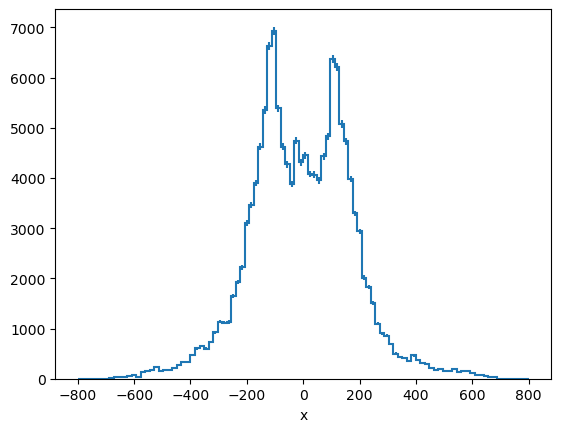

In [5]:
h = hist.Hist.new.Regular(100, -800, 800, name="x").Double()
h.fill(ak.flatten(raw_data.cscRechitsX))
hep.histplot(h)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fbcffbb5b10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

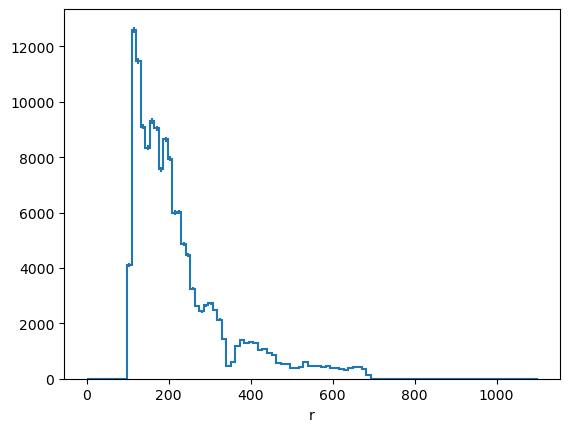

In [6]:
cscRechits_r = np.sqrt((raw_data.cscRechitsX ** 2)  + (raw_data.cscRechitsY ** 2))
r = hist.Hist.new.Regular(100, 0, 1100, name="r").Double()
r.fill(ak.flatten(cscRechits_r))
hep.histplot(r)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fbcffc531d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

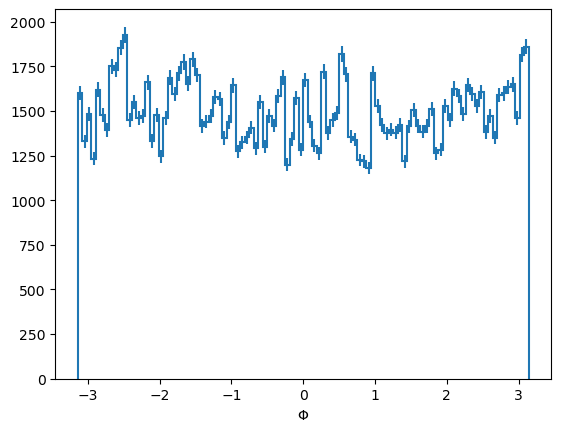

In [7]:
phi = hist.Hist.new.Regular(100, -np.pi, np.pi, name="$\Phi$").Double()
phi.fill(ak.flatten(raw_data.cscRechitsPhi))
hep.histplot(phi)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fbcffa948d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

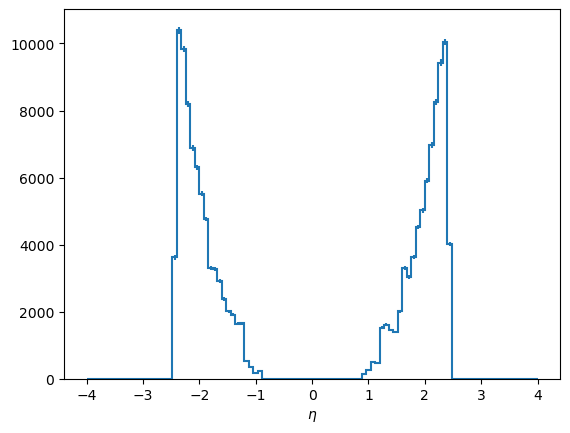

In [8]:
eta = hist.Hist.new.Regular(100, -4, 4, name="$\eta$").Double()
eta.fill(ak.flatten(raw_data.cscRechitsEta))
hep.histplot(eta)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fbcff895a10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

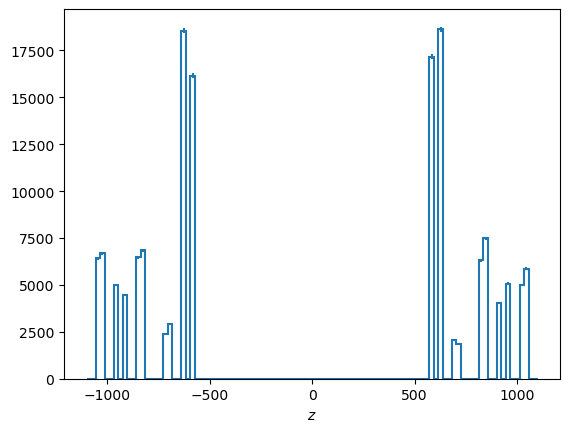

In [9]:
z = hist.Hist.new.Regular(100, -1100, 1100, name="$z$").Double()
z.fill(ak.flatten(raw_data.cscRechitsZ))
hep.histplot(z)

In [10]:
from scipy.spatial.distance import pdist

del_r = []

r_arr = np.array(ak.flatten(cscRechits_r))
sub_arr = np.abs(r_arr[:,None] - r_arr)
N = r_arr.size
rem_idx = np.arange(N)*(N+1)

out = np.delete(sub_arr,rem_idx)

In [11]:
len(out)

22316625156

In [12]:
out

array([ 1.3616028,  2.7862396,  5.8200073, ..., 14.29834  ,  0.938324 ,
       15.20047  ], dtype=float32)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fbcff8d7f50>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

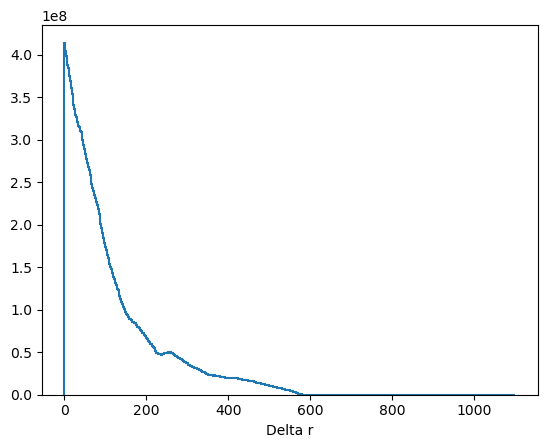

In [13]:
delta_r = hist.Hist.new.Regular(500, 0, 1100, name="Delta r").Double()
delta_r.fill(out)
hep.histplot(delta_r)